In [133]:
#%% file import pre procesing
import pandas as pd
import numpy as np


import io 
import requests 
import os
import glob
#plots
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [134]:
fmr1_df = pd.read_csv('Fmr1 Rxn averages by individals.csv') # loading in the file from the folder we are in


fmr1_df # then just printing the datafram so you can see it

,Unnamed: 0,ID,Genotype,Duration,Dur (ms),Intensity,Phase,count,Rxn
0,1,BP1,Fmr1-LE_KO,Alone,100,30,BBN Rxn,5,302.253856
1,2,BP1,Fmr1-LE_KO,Alone,100,30,BBN TH,5,277.881634
2,3,BP1,Fmr1-LE_KO,Alone,100,35,BBN TH,3,217.035686
3,4,BP1,Fmr1-LE_KO,Alone,100,40,BBN Rxn,5,207.733037
4,5,BP1,Fmr1-LE_KO,Alone,100,40,BBN TH,5,219.183216
...,...,...,...,...,...,...,...,...,...
800,801,Purple1,Fmr1-LE_WT,Alone,300,40,BBN Rxn,1,260.742533
801,802,Purple1,Fmr1-LE_WT,Alone,300,50,BBN Rxn,1,213.976630
802,803,Purple1,Fmr1-LE_WT,Alone,300,60,BBN Rxn,1,231.410156
803,804,Purple1,Fmr1-LE_WT,Alone,300,70,BBN Rxn,1,217.562848


In [135]:
# we need to get rid of the durations we don't want i.e. keep alone duration
fmr1_alone_df = fmr1_df.loc[fmr1_df['Duration'] == 'Alone']
fmr1_alone_df

,Unnamed: 0,ID,Genotype,Duration,Dur (ms),Intensity,Phase,count,Rxn
0,1,BP1,Fmr1-LE_KO,Alone,100,30,BBN Rxn,5,302.253856
1,2,BP1,Fmr1-LE_KO,Alone,100,30,BBN TH,5,277.881634
2,3,BP1,Fmr1-LE_KO,Alone,100,35,BBN TH,3,217.035686
3,4,BP1,Fmr1-LE_KO,Alone,100,40,BBN Rxn,5,207.733037
4,5,BP1,Fmr1-LE_KO,Alone,100,40,BBN TH,5,219.183216
...,...,...,...,...,...,...,...,...,...
800,801,Purple1,Fmr1-LE_WT,Alone,300,40,BBN Rxn,1,260.742533
801,802,Purple1,Fmr1-LE_WT,Alone,300,50,BBN Rxn,1,213.976630
802,803,Purple1,Fmr1-LE_WT,Alone,300,60,BBN Rxn,1,231.410156
803,804,Purple1,Fmr1-LE_WT,Alone,300,70,BBN Rxn,1,217.562848


In [136]:
# we only wamt to look at 50 ms
fmr1_alone_50ms_df = fmr1_alone_df.loc[fmr1_alone_df['Dur (ms)'] == 50]
fmr1_alone_50ms_df

,Unnamed: 0,ID,Genotype,Duration,Dur (ms),Intensity,Phase,count,Rxn
65,66,BP1,Fmr1-LE_KO,Alone,50,35,BBN TH,2,178.349925
66,67,BP1,Fmr1-LE_KO,Alone,50,40,BBN Rxn,5,249.992614
67,68,BP1,Fmr1-LE_KO,Alone,50,40,BBN TH,4,195.944389
68,69,BP1,Fmr1-LE_KO,Alone,50,45,BBN TH,2,165.873444
69,70,BP1,Fmr1-LE_KO,Alone,50,50,BBN Rxn,5,209.188533
...,...,...,...,...,...,...,...,...,...
735,736,LP2,Fmr1-LE_WT,Alone,50,60,BBN Rxn,5,266.350396
736,737,LP2,Fmr1-LE_WT,Alone,50,60,BBN TH,2,247.250138
738,739,LP2,Fmr1-LE_WT,Alone,50,70,BBN Rxn,5,218.649967
739,740,LP2,Fmr1-LE_WT,Alone,50,70,BBN TH,2,219.851789


In [137]:
# we only wamt to look at 30 - 80 db in steps of 10
db2080_ls = list(range(30,81,10)) # make a list of 20 to 80 in steps of 10
print(db2080_ls)
db2080_fmr1_df = fmr1_alone_50ms_df.loc[fmr1_alone_50ms_df['Intensity'].isin(db2080_ls)]
db2080_fmr1_df

[30, 40, 50, 60, 70, 80]


,Unnamed: 0,ID,Genotype,Duration,Dur (ms),Intensity,Phase,count,Rxn
66,67,BP1,Fmr1-LE_KO,Alone,50,40,BBN Rxn,5,249.992614
67,68,BP1,Fmr1-LE_KO,Alone,50,40,BBN TH,4,195.944389
69,70,BP1,Fmr1-LE_KO,Alone,50,50,BBN Rxn,5,209.188533
70,71,BP1,Fmr1-LE_KO,Alone,50,50,BBN TH,2,184.245721
71,72,BP1,Fmr1-LE_KO,Alone,50,60,BBN Rxn,5,178.458464
...,...,...,...,...,...,...,...,...,...
735,736,LP2,Fmr1-LE_WT,Alone,50,60,BBN Rxn,5,266.350396
736,737,LP2,Fmr1-LE_WT,Alone,50,60,BBN TH,2,247.250138
738,739,LP2,Fmr1-LE_WT,Alone,50,70,BBN Rxn,5,218.649967
739,740,LP2,Fmr1-LE_WT,Alone,50,70,BBN TH,2,219.851789


In [138]:
# group by each individual rat and get each rats average for each intensity 
# so we don't skew the results in favor of any single rat


rt_mean = db2080_fmr1_df.groupby(['ID','Intensity']).mean()
rt_mean = rt_mean.groupby(['Intensity']).mean()
rt_mean


,Unnamed: 0,Dur (ms),count,Rxn
Intensity,,,,
30,441.357143,50.0,5.428571,361.599341
40,398.000000,50.0,5.312500,290.094626
50,401.750000,50.0,3.937500,275.406173
60,404.500000,50.0,3.937500,256.733623
70,407.250000,50.0,3.937500,237.505094
80,409.500000,50.0,5.875000,210.162940


In [139]:
# but we also need the counts for each intensity so we can calculate SEM
rt_n = db2080_fmr1_df.groupby(['Intensity']).sum()
rt_n

,Unnamed: 0,Dur (ms),count,Rxn
Intensity,,,,
30,6179,700,76,5062.390769
40,6368,800,85,4641.514010
50,6428,800,63,4406.498772
60,6472,800,63,4107.737966
70,6516,800,63,3800.081502
80,3276,400,47,1681.303519


In [140]:
rt_sem = db2080_fmr1_df.groupby(['ID','Intensity']).sem()
rt_sem



Unnamed: 0  Dur (ms)  count        Rxn
ID  Intensity                                        
BP1 40                0.5       0.0    0.5  27.024112
    50                0.5       0.0    1.5  12.471406
    60                0.5       0.0    1.5  11.190865
    70                0.5       0.0    1.5   8.410184
    80                NaN       NaN    NaN        NaN
BP2 30                0.5       0.0    0.0  18.480233
    40                0.5       0.0    0.0   3.073474
    50                0.5       0.0    1.5  20.575545
    60                0.5       0.0    1.5  14.304622
    70                0.5       0.0    1.5  11.618086
    80                NaN       NaN    NaN        NaN
BP3 30                0.5       0.0    0.0  28.035270
    40                0.5       0.0    0.0  15.384402
    50                0.5       0.0    1.5  18.246785
    60                0.5       0.0    1.5  23.112777
    70                0.5       0.0    1.5  49.741121
    80                NaN       NaN    NaN        NaN
BP4 30                0.5       0.0    2.5   4.957073
    40                0.5       0.0    2.5   3.952095
    50                0.5       0.0    3.5   4.485756
    60                0.5       0.0    3.5  18.537321
    70                0.5       0.0    3.5  18.029044
    80                NaN       NaN    NaN        NaN
BP5 30                0.5       0.0    0.0  10.099555
    40                0.5       0.0    0.0   1.627533
    50                0.5       0.0    1.5   7.969390
    60                0.5       0.0    1.5  12.422131
    70                0.5       0.0    1.5   1.119238
    80                NaN       NaN    NaN        NaN
BP6 30                0.5       0.0    1.0  22.001786
    40                0.5       0.0    1.0   4.620255
    50                0.5       0.0    2.5   9.490412
    60                0.5       0.0    2.5  12.610193
    70                0.5       0.0    2.5   2.308723
    80                NaN       NaN    NaN        NaN
LP1 30                0.5       0.0    0.5  15.439969
    40                0.5       0.0    0.5  32.092563
    50                0.5       0.0    2.0  24.081868
    60                0.5       0.0    2.0  18.150851
    70                0.5       0.0    2.0  27.862782
    80                NaN       NaN    NaN        NaN
LP2 30                0.5       0.0    0.0  20.502847
    40                0.5       0.0    0.0   3.341392
    50                0.5       0.0    1.5   4.572752
    60                0.5       0.0    1.5   9.550129
    70                0.5       0.0    1.5   0.600911
    80                NaN       NaN    NaN        NaN

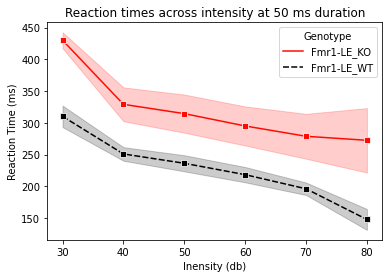

In [141]:
# this automatically plots the averages and their standard error
fig1,ax1 = plt.subplots()
colors = ["#FF0B04", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=db2080_fmr1_df, x="Intensity", y="Rxn",hue = "Genotype",style='Genotype',errorbar=('se'),marker='s')
plt.ylabel('Reaction Time (ms)')
plt.xlabel('Inensity (db)')
plt.title('Reaction times across intensity at 50 ms duration')

plt.savefig('mean_rt_sem.pdf')

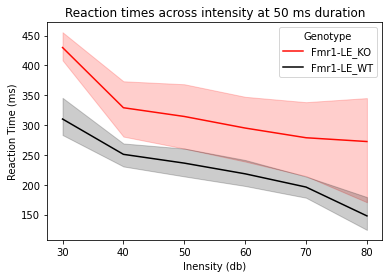

In [142]:
# this automatically plots the averages and their 95% confidence interval
fig1,ax1 = plt.subplots()
colors = ["#FF0B04", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=db2080_fmr1_df, x="Intensity", y="Rxn",hue = "Genotype",errorbar=('ci'))
plt.ylabel('Reaction Time (ms)')
plt.xlabel('Inensity (db)')
plt.title('Reaction times across intensity at 50 ms duration')

plt.savefig('mean_rt_0.05p.pdf')

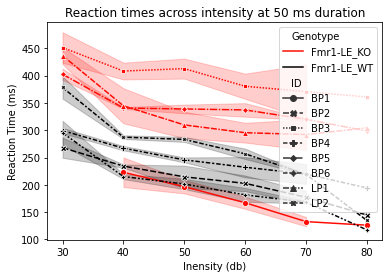

In [143]:
# sanity check, let's look at each individual rat on a plot with 95% confidence interval
fig1,ax1 = plt.subplots()
sns.lineplot(data=db2080_fmr1_df, x="Intensity", y="Rxn",hue = "Genotype",style='ID',errorbar=('ci'),markers=True)
plt.ylabel('Reaction Time (ms)')
plt.xlabel('Inensity (db)')
plt.title('Reaction times across intensity at 50 ms duration')
plt.savefig('Individual_means_0.05p.pdf')

In [325]:
# now we need d prime graphs
# load in Hit and FA data
fmr1_dprime = pd.read_csv('Fmr1-LE Hit_FA.csv') # loading in the file from the folder we are in

fmr1_dprime_sum = fmr1_dprime.groupby(['Genotype','ID','Inten (dB)']).sum() # group by intensity and then take the sum of hits and 
                                                          # misses and fas and CRs for that db
fmr1_dprime_sum# print dataframe


Unnamed: 0  Dur (ms)  Type      CR     FA  \
Genotype   ID      Inten (dB)                                              
Fmr1-LE_KO BP1     -100               384      1500     0  4154.0  929.0   
                    10                461       900     6     0.0    0.0   
                    15                467       900     6     0.0    0.0   
                    20                598      1800    12     0.0    0.0   
                    25                479       900     6     0.0    0.0   
...                                   ...       ...   ...     ...    ...   
Fmr1-LE_WT Purple1  40               1133       300     1     0.0    0.0   
                    50               1134       300     1     0.0    0.0   
                    60               1135       300     1     0.0    0.0   
                    70               1136       300     1     0.0    0.0   
                    80               1137       300     1     0.0    0.0   

                                 Hit    Miss  
Genotype   ID      Inten (dB)                 
Fmr1-LE_KO BP1     -100          0.0     0.0  
                    10          62.0   245.0  
                    15         118.0   229.0  
                    20         540.0  1157.0  
                    25         198.0   150.0  
...                              ...     ...  
Fmr1-LE_WT Purple1  40          90.0     2.0  
                    50          93.0     0.0  
                    60          91.0     0.0  
                    70          92.0     0.0  
                    80          92.0     0.0  

[166 rows x 7 columns]

In [326]:
# calculate fa and hit rate
# fa% = fa/(fa+cr)
# hit% = hit(hit+miss)

fmr1_dprime_sum['Hit Rate'] =  (fmr1_dprime_sum['Hit']/(fmr1_dprime_sum['Hit']+fmr1_dprime_sum['Miss']))
fmr1_dprime_sum['FA Rate'] =  (fmr1_dprime_sum['FA']/(fmr1_dprime_sum['FA']+fmr1_dprime_sum['CR']))

fmr1_dprime_sum

Unnamed: 0  Dur (ms)  Type      CR     FA  \
Genotype   ID      Inten (dB)                                              
Fmr1-LE_KO BP1     -100               384      1500     0  4154.0  929.0   
                    10                461       900     6     0.0    0.0   
                    15                467       900     6     0.0    0.0   
                    20                598      1800    12     0.0    0.0   
                    25                479       900     6     0.0    0.0   
...                                   ...       ...   ...     ...    ...   
Fmr1-LE_WT Purple1  40               1133       300     1     0.0    0.0   
                    50               1134       300     1     0.0    0.0   
                    60               1135       300     1     0.0    0.0   
                    70               1136       300     1     0.0    0.0   
                    80               1137       300     1     0.0    0.0   

                                 Hit    Miss  Hit Rate   FA Rate  
Genotype   ID      Inten (dB)                                     
Fmr1-LE_KO BP1     -100          0.0     0.0       NaN  0.182766  
                    10          62.0   245.0  0.201954       NaN  
                    15         118.0   229.0  0.340058       NaN  
                    20         540.0  1157.0  0.318209       NaN  
                    25         198.0   150.0  0.568966       NaN  
...                              ...     ...       ...       ...  
Fmr1-LE_WT Purple1  40          90.0     2.0  0.978261       NaN  
                    50          93.0     0.0  1.000000       NaN  
                    60          91.0     0.0  1.000000       NaN  
                    70          92.0     0.0  1.000000       NaN  
                    80          92.0     0.0  1.000000       NaN  

[166 rows x 9 columns]

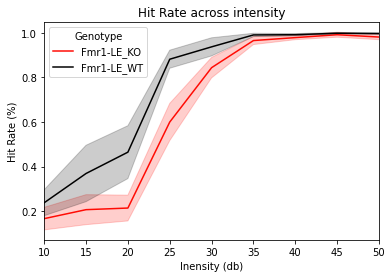

In [327]:
# plot hit rate and FA rate
fig1,ax1 = plt.subplots()
colors = ["#FF0B04", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=fmr1_dprime_sum, x="Inten (dB)", y="Hit Rate",hue = "Genotype",errorbar=('se',2))
plt.ylabel('Hit Rate (%)')
plt.xlabel('Inensity (db)')
plt.title('Hit Rate across intensity')
plt.xlim(10,50)

plt.savefig('HitRate_genotype.pdf')

In [328]:
# for d-prime we need the z-score hit and fa rates
# first need to get rid of 100% hit rate values
test = fmr1_dprime_sum.loc[fmr1_dprime_sum['Hit Rate'] == 1]
fmr1_dprime_sum['Hit Rate'].replace(1, .999,inplace=True)

fmr1_dprime_sum['Hit Z'] =  (stats.norm.ppf(fmr1_dprime_sum['Hit Rate']))
fmr1_dprime_sum['FA Z'] =  (stats.norm.ppf(fmr1_dprime_sum['FA Rate']))

fmr1_dprime_sum

Unnamed: 0  Dur (ms)  Type      CR     FA  \
Genotype   ID      Inten (dB)                                              
Fmr1-LE_KO BP1     -100               384      1500     0  4154.0  929.0   
                    10                461       900     6     0.0    0.0   
                    15                467       900     6     0.0    0.0   
                    20                598      1800    12     0.0    0.0   
                    25                479       900     6     0.0    0.0   
...                                   ...       ...   ...     ...    ...   
Fmr1-LE_WT Purple1  40               1133       300     1     0.0    0.0   
                    50               1134       300     1     0.0    0.0   
                    60               1135       300     1     0.0    0.0   
                    70               1136       300     1     0.0    0.0   
                    80               1137       300     1     0.0    0.0   

                                 Hit    Miss  Hit Rate   FA Rate     Hit Z  \
Genotype   ID      Inten (dB)                                                
Fmr1-LE_KO BP1     -100          0.0     0.0       NaN  0.182766       NaN   
                    10          62.0   245.0  0.201954       NaN -0.834661   
                    15         118.0   229.0  0.340058       NaN -0.412306   
                    20         540.0  1157.0  0.318209       NaN -0.472714   
                    25         198.0   150.0  0.568966       NaN  0.173741   
...                              ...     ...       ...       ...       ...   
Fmr1-LE_WT Purple1  40          90.0     2.0  0.978261       NaN  2.019086   
                    50          93.0     0.0  0.999000       NaN  3.090232   
                    60          91.0     0.0  0.999000       NaN  3.090232   
                    70          92.0     0.0  0.999000       NaN  3.090232   
                    80          92.0     0.0  0.999000       NaN  3.090232   

                                   FA Z  
Genotype   ID      Inten (dB)            
Fmr1-LE_KO BP1     -100       -0.904874  
                    10              NaN  
                    15              NaN  
                    20              NaN  
                    25              NaN  
...                                 ...  
Fmr1-LE_WT Purple1  40              NaN  
                    50              NaN  
                    60              NaN  
                    70              NaN  
                    80              NaN  

[166 rows x 11 columns]

In [329]:
#test = fmr1_dprime_sum['FA Z'].fillna(fmr1_dprime_sum.groupby('Genotype').first())
#test = fmr1_dprime_sum.fillna(fmr1_dprime_sum.groupby(['Genotype', 'Inten (dB)']).first())
fa_vals =fmr1_dprime_sum['FA Z'].fillna(method='ffill')
fa_vals = fa_vals.to_frame()
fa_vals

FA Z
Genotype   ID      Inten (dB)          
Fmr1-LE_KO BP1     -100       -0.904874
                    10        -0.904874
                    15        -0.904874
                    20        -0.904874
                    25        -0.904874
...                                 ...
Fmr1-LE_WT Purple1  40        -1.429964
                    50        -1.429964
                    60        -1.429964
                    70        -1.429964
                    80        -1.429964

[166 rows x 1 columns]

In [330]:
# d prime = difference in z scores
fmr1_dprime_sum['d-prime'] = (fmr1_dprime_sum['Hit Z']-fa_vals['FA Z'])
fmr1_dprime_sum

Unnamed: 0  Dur (ms)  Type      CR     FA  \
Genotype   ID      Inten (dB)                                              
Fmr1-LE_KO BP1     -100               384      1500     0  4154.0  929.0   
                    10                461       900     6     0.0    0.0   
                    15                467       900     6     0.0    0.0   
                    20                598      1800    12     0.0    0.0   
                    25                479       900     6     0.0    0.0   
...                                   ...       ...   ...     ...    ...   
Fmr1-LE_WT Purple1  40               1133       300     1     0.0    0.0   
                    50               1134       300     1     0.0    0.0   
                    60               1135       300     1     0.0    0.0   
                    70               1136       300     1     0.0    0.0   
                    80               1137       300     1     0.0    0.0   

                                 Hit    Miss  Hit Rate   FA Rate     Hit Z  \
Genotype   ID      Inten (dB)                                                
Fmr1-LE_KO BP1     -100          0.0     0.0       NaN  0.182766       NaN   
                    10          62.0   245.0  0.201954       NaN -0.834661   
                    15         118.0   229.0  0.340058       NaN -0.412306   
                    20         540.0  1157.0  0.318209       NaN -0.472714   
                    25         198.0   150.0  0.568966       NaN  0.173741   
...                              ...     ...       ...       ...       ...   
Fmr1-LE_WT Purple1  40          90.0     2.0  0.978261       NaN  2.019086   
                    50          93.0     0.0  0.999000       NaN  3.090232   
                    60          91.0     0.0  0.999000       NaN  3.090232   
                    70          92.0     0.0  0.999000       NaN  3.090232   
                    80          92.0     0.0  0.999000       NaN  3.090232   

                                   FA Z   d-prime  
Genotype   ID      Inten (dB)                      
Fmr1-LE_KO BP1     -100       -0.904874       NaN  
                    10              NaN  0.070213  
                    15              NaN  0.492568  
                    20              NaN  0.432160  
                    25              NaN  1.078615  
...                                 ...       ...  
Fmr1-LE_WT Purple1  40              NaN  3.449050  
                    50              NaN  4.520197  
                    60              NaN  4.520197  
                    70              NaN  4.520197  
                    80              NaN  4.520197  

[166 rows x 12 columns]

In [331]:
# need to fill NaN values so we can plot
dprime_0na = fmr1_dprime_sum.fillna(0)

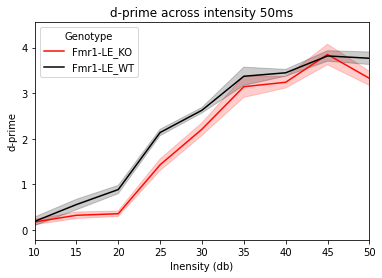

In [332]:
# plot hit rate and FA rate

fig1,ax1 = plt.subplots()
colors = ["#FF0B04", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=dprime_0na, x="Inten (dB)", y="d-prime",hue = "Genotype",errorbar=('se'))
plt.ylabel('d-prime')
plt.xlabel('Inensity (db)')
plt.title('d-prime across intensity 50ms')
plt.xlim(10,50)
plt.savefig('dprime_genotype.pdf')

In [342]:
# need to get first row for each becuase thats where FA rate is

#fa_rate_geno = fmr1_dprime_sum.groupby(['Genotype','ID']).first()
#fa_rate_geno
fmr1_dprime_sum

Unnamed: 0  Dur (ms)  Type      CR     FA  \
Genotype   ID      Inten (dB)                                              
Fmr1-LE_KO BP1     -100               384      1500     0  4154.0  929.0   
                    10                461       900     6     0.0    0.0   
                    15                467       900     6     0.0    0.0   
                    20                598      1800    12     0.0    0.0   
                    25                479       900     6     0.0    0.0   
...                                   ...       ...   ...     ...    ...   
Fmr1-LE_WT Purple1  40               1133       300     1     0.0    0.0   
                    50               1134       300     1     0.0    0.0   
                    60               1135       300     1     0.0    0.0   
                    70               1136       300     1     0.0    0.0   
                    80               1137       300     1     0.0    0.0   

                                 Hit    Miss  Hit Rate   FA Rate     Hit Z  \
Genotype   ID      Inten (dB)                                                
Fmr1-LE_KO BP1     -100          0.0     0.0       NaN  0.182766       NaN   
                    10          62.0   245.0  0.201954       NaN -0.834661   
                    15         118.0   229.0  0.340058       NaN -0.412306   
                    20         540.0  1157.0  0.318209       NaN -0.472714   
                    25         198.0   150.0  0.568966       NaN  0.173741   
...                              ...     ...       ...       ...       ...   
Fmr1-LE_WT Purple1  40          90.0     2.0  0.978261       NaN  2.019086   
                    50          93.0     0.0  0.999000       NaN  3.090232   
                    60          91.0     0.0  0.999000       NaN  3.090232   
                    70          92.0     0.0  0.999000       NaN  3.090232   
                    80          92.0     0.0  0.999000       NaN  3.090232   

                                   FA Z   d-prime  
Genotype   ID      Inten (dB)                      
Fmr1-LE_KO BP1     -100       -0.904874       NaN  
                    10              NaN  0.070213  
                    15              NaN  0.492568  
                    20              NaN  0.432160  
                    25              NaN  1.078615  
...                                 ...       ...  
Fmr1-LE_WT Purple1  40              NaN  3.449050  
                    50              NaN  4.520197  
                    60              NaN  4.520197  
                    70              NaN  4.520197  
                    80              NaN  4.520197  

[166 rows x 12 columns]

In [334]:
# need FA rate mean for each genotype
fa_rate_means = fmr1_dprime_sum.groupby(['Genotype']).mean()
#fa_rate_means = fa_rate_means['FA Rate']


In [335]:
fa_rate_means

,Unnamed: 0,Dur (ms),Type,CR,FA,Hit,Miss,Hit Rate,FA Rate,Hit Z,FA Z,d-prime
Genotype,,,,,,,,,,,,
Fmr1-LE_KO,3783.354430,1188.607595,6.734177,333.493671,44.721519,699.468354,183.759494,0.746352,0.124529,1.276338,-1.166497,2.443568
Fmr1-LE_WT,4000.781609,1077.586207,5.908046,293.310345,64.655172,739.689655,95.747126,0.831311,0.169786,1.805651,-0.993778,2.775318


Text(0.5, 1.0, 'FA Rate compared between Genotypes')

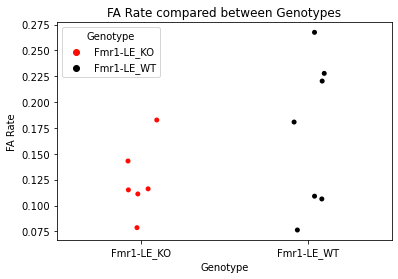

In [336]:
fig1,ax1 = plt.subplots()
colors = ["#FF0B04", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.stripplot(data=fa_rate_geno, x="Genotype", y="FA Rate",hue = "Genotype")
plt.ylabel('FA Rate')
plt.xlabel('Genotype')
plt.title('FA Rate compared between Genotypes')


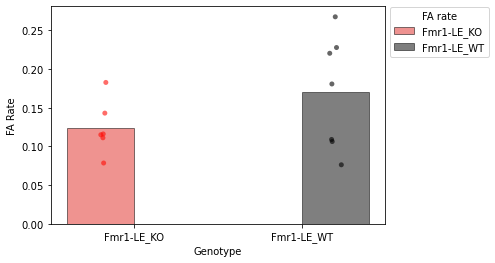

In [337]:
ax = sns.barplot(
    x='Genotype', 
    y='FA Rate', 
    hue='Genotype', 
    data=fa_rate_means.reset_index(), 
    errorbar='se', 
    edgecolor="black",
    errcolor="black",
    errwidth=1.5,
    capsize = 0.1,
    alpha=0.5
)

sns.stripplot(
    x="Genotype", 
    y="FA Rate", 
    hue="Genotype",
    data=fa_rate_geno, dodge=True, alpha=0.6, ax=ax
)

# remove extra legend handles
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:], labels[2:], title='FA rate', bbox_to_anchor=(1, 1.02), loc='upper left')